<a href="https://colab.research.google.com/github/Martinerramuspe/02-DATA_SCIENCIE/blob/main/00-CODER_HOUSE/04-ENTREGABLE/ENTREGA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEMATICA: RECLAMO DE MINISTERIOS.

La facultad, donde se dicta este curso de matematicas, necesita mejorar el promedio de las notas de cursada, para el proximo año, por una solicitud del ministerio de educacion de la provincia. Si no se lograr una mejora se recortan los subcidios de los servicios que paga la entidad privada.

Los dueños estan dispuesto a tomar medidas, pero solo cuentan con registros de alumnos, y de los  movimientos que realizaron cada uno de ellos, este ultimo año de año (dataframe).

# OBJETIVO: MEJORAR EL PROMEDIO DE LAS NOTAS DE LA CURSADA
Para eso, vamos a estudiar la variable "G1"  como variable target, siendo la misma, las notas de primer trimestre de los alumnos (Otra opcion seria estudiar los alumonOs que se sacaron 0 en G2 y G3, pero no contamos con suficientes datos, osea atacar el problema).
Analizaremos y combinaremos las distintas variables predictoras que nos permitan obtener el modelo mas eficiente, para predecir con cierta estimacion, la nota que puede llegar a tener un alumno en el primer trimestre en funcion a sus caracteristicas, previo al ingreso de la cursada. Con esto, los dueños de la cursada puede decir quien ingresa o no, logrando asi mejorar las estadisticas de las notas año a año.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# LA FUENTE DE ESTE DATAFRAME ES KAGLE, SE CARGO EL .CSV EN REPOSITORIO DE GITHUB.
url = "https://github.com/Martinerramuspe/02-DATA_SCIENCIE/blob/main/00-CODER_HOUSE/00-DATASETS/student-mat.csv?raw=true"
df = pd.read_csv(url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


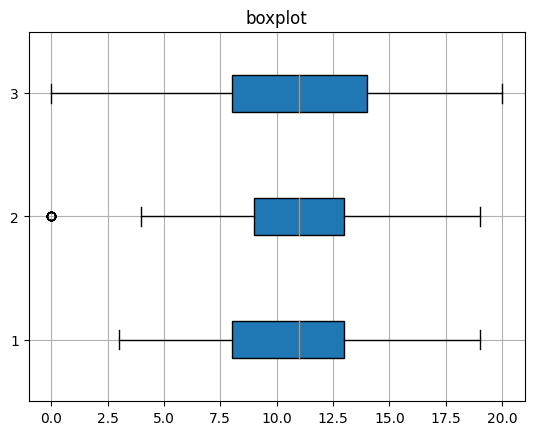

In [ ]:
plt.boxplot([df["G1"],df["G2"],df["G3"]],vert=False,patch_artist=True)
plt.grid(True)
plt.title("boxplot")
plt.show()

OBSERVACION_00: Se elige target "G1", ya que a diferencia G2 Y G3, este sigue una distribucion normal. Lo cual  para modelos de regresion ayuda a la eficiencia de la interpretacion de los resultados. (G2: Posee datos atipicos y G3: Esta sesgado).

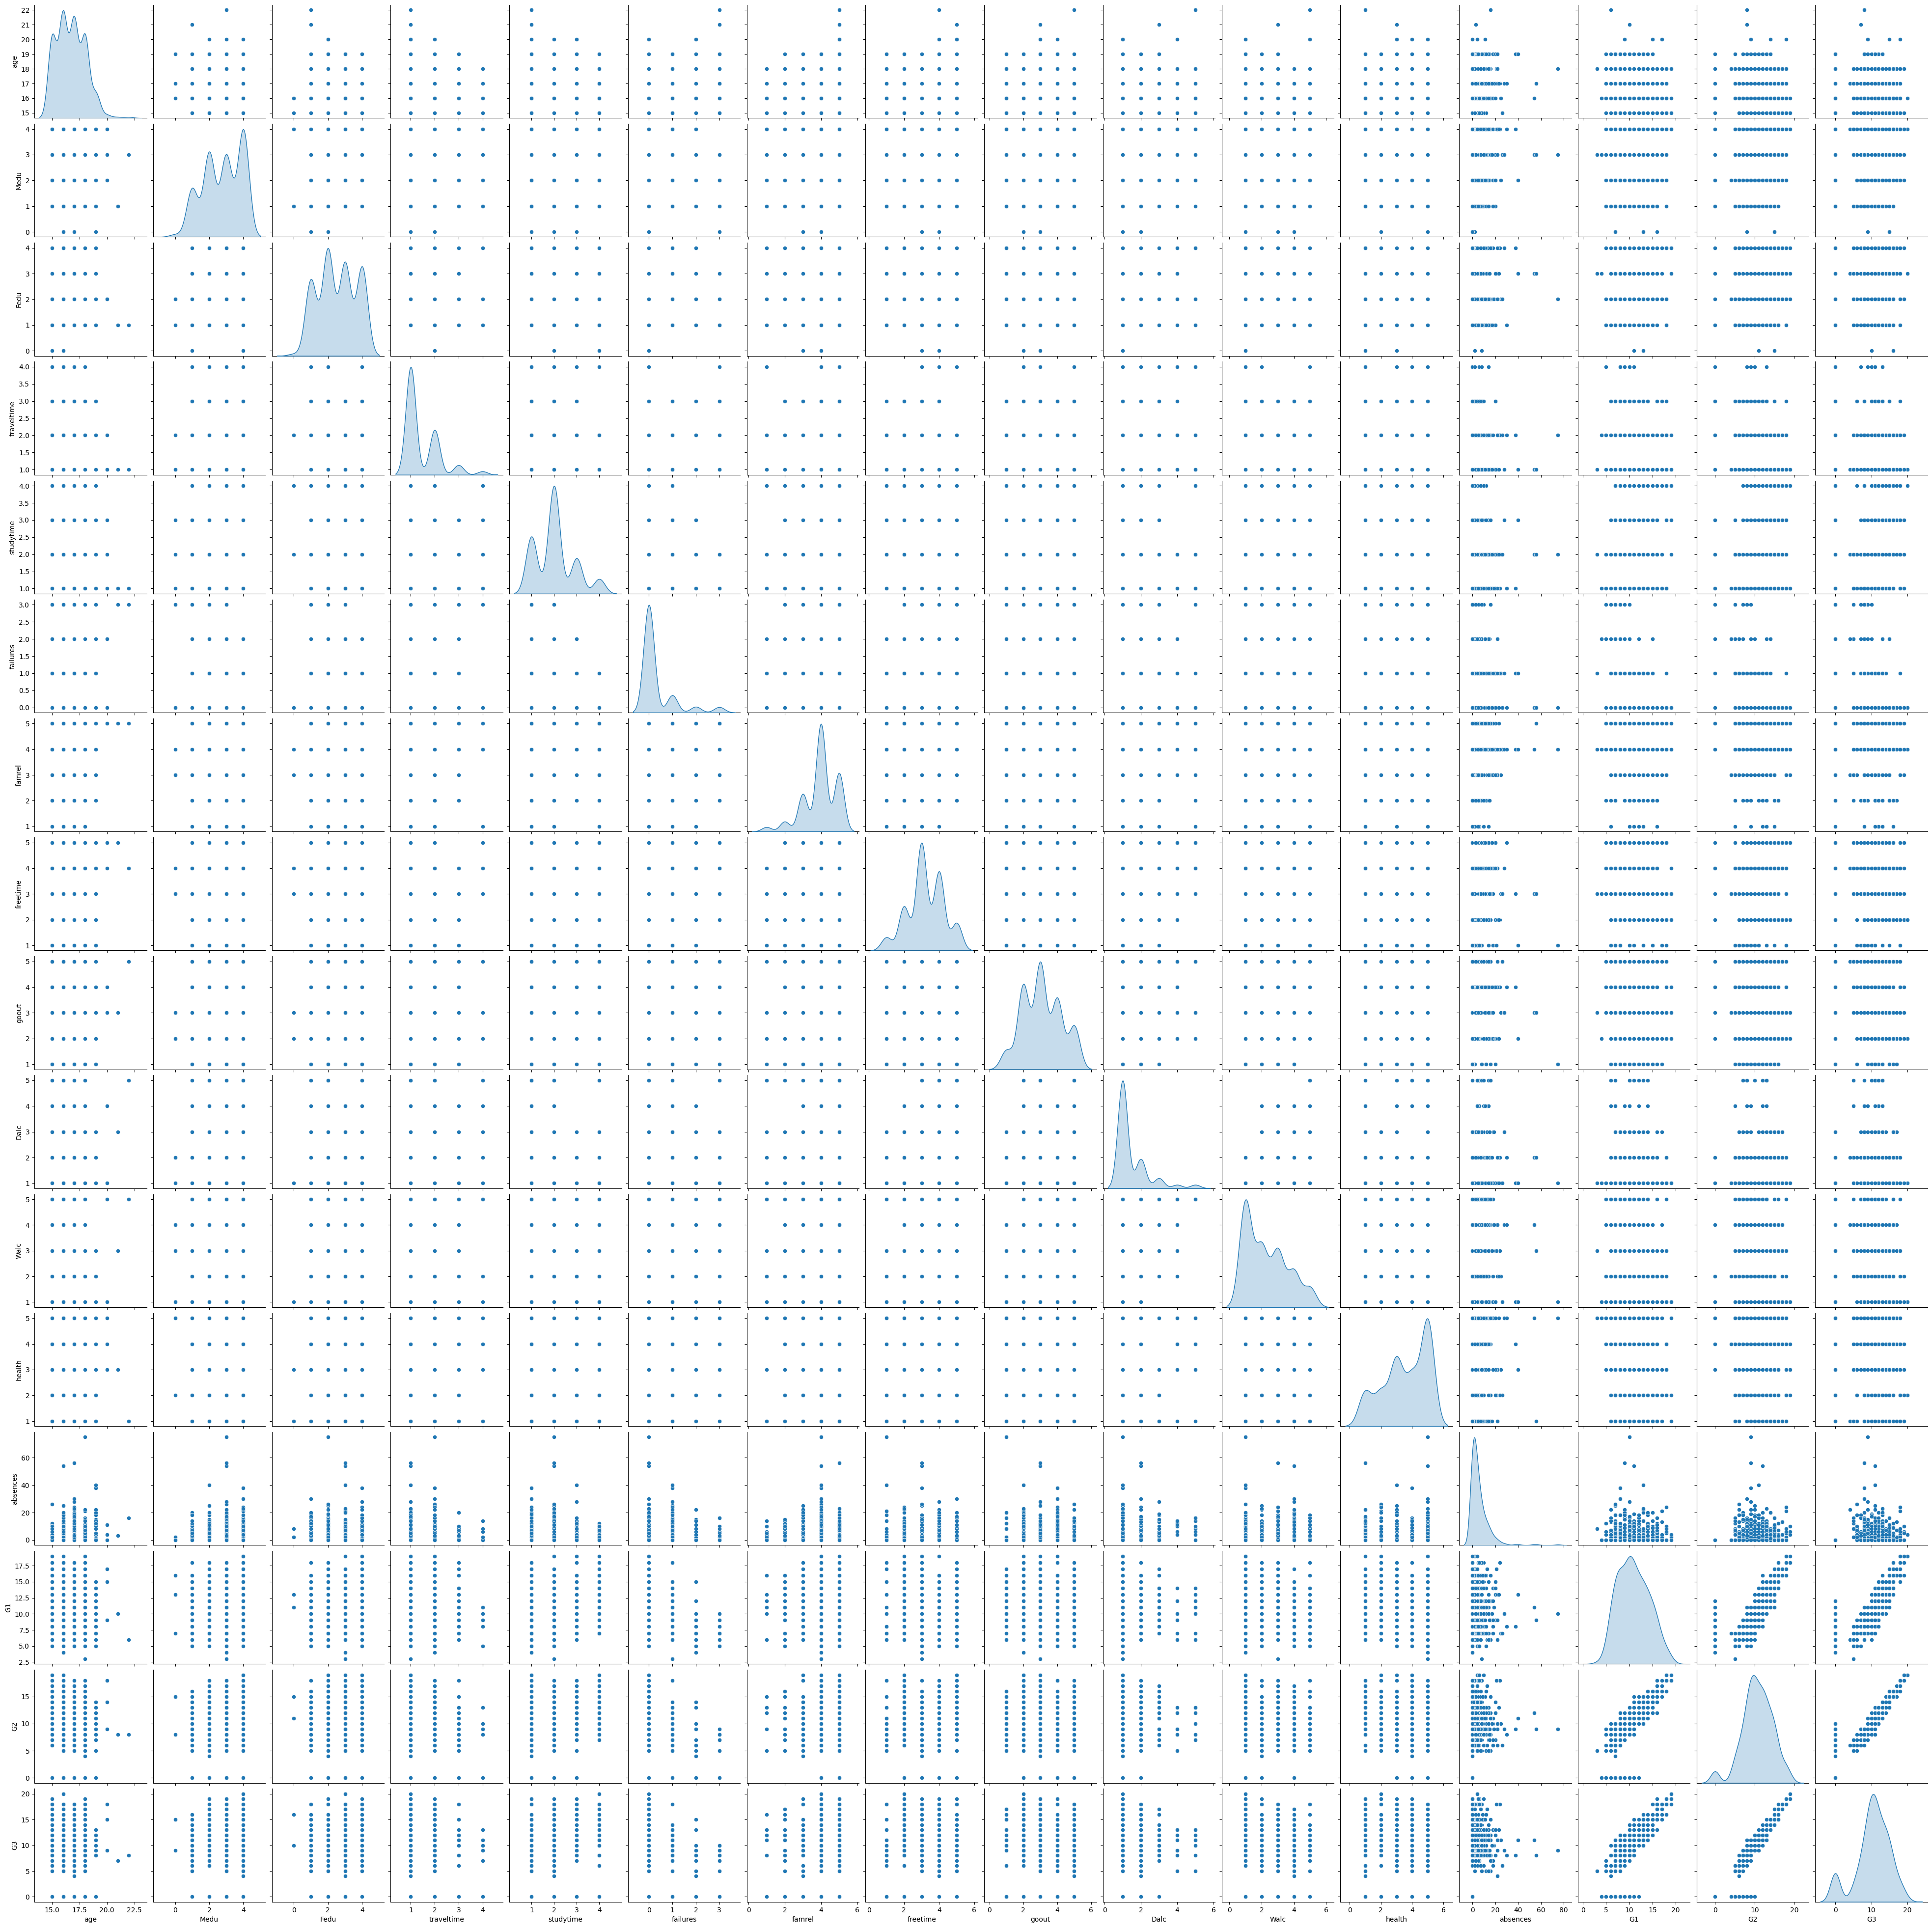

In [ ]:
sns.pairplot(df, diag_kind="kde")
plt.show()

OBSERVACION_01: EFICIENCIA DEL MODELO KNN.
* El modelo K-Nearest Neighbors (kNN) puede verse más afectado por las variables discretas en comparación con los modelos de regresión. Esto se debe a que kNN es un modelo mas sencible con el tema de las distancias entre puntos de datos, y las variables discretas pueden limitar la capacidad del algoritmo para calcular distancias de manera efectiva. Como podemos ver en el grafico anterior, la gran parte de las variables son de tipo discretas.

In [ ]:
import plotly.express as px

In [ ]:
px.scatter_3d(df,x='school',y='age',z='G3')

# PARTE N°1: EXPULSION DE VARIABLES IRRELEVANTES.
No podemos esperar a que el, alumnno cursen, para poder determinar ciertas variables del dataframe.El modelo esta pensado para poder predecir la nota del alumno, previo al ingreso de la cursada, en funcion a sus caracteristicas.

* absences: Ausencia en la cursada.
* Paid: Clases extra pagadas dentro de la materia del curso.
* Dalc: Dato donde no se tiende a decir la verdad.
* Walc: Dato donde no se tiende a decir la verdad.
* G2: Por lo que mencionamos en la OBSERVACION_00.
* G3: Por lo que mencionamos en la OBSERVACION_00.



In [ ]:
df1= df.drop(["absences","paid","Dalc","Walc","G2","G3"],axis=1)

# PARTE N°2: EXPULSION DE VARIABLES CON SIMILITUD EN SUS CARACTERISTICAS.
 La variable "address" con variable "traveltime": Ambas estan relacionadas con la ubicacion del individuo. Tomamos para modelar a "traveltime" ya que posee datos de tipo de cuantitativos continuos.

In [ ]:
df2= df1.drop(["address"],axis=1)

# PARTE N°3: ASIGNACION DE VARIABLES DE INTERES
Segun la exploracion realizada en las anteriores entregas. Hay variables que tienen muchas mas incidencia sobre otras (Mas halla de que todas sirven).Se procede a seleccionar aquellas de interes.


In [ ]:
df2.columns

Index(['school', 'sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'health', 'G1'],
      dtype='object')

In [ ]:
df3=df2[['school','sex','age','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','traveltime','studytime','schoolsup','famsup','activities','higher','internet','romantic','famrel','freetime','goout','health','G1']]

# PARTE N°4: PRE-PROCESAMIENTO DE DATAFRAME
* Convertimos todos los datos tipos "object" a "int".
* Creamos dos dataframe, uno sin escalar (df01) y otro escalado (df02).
* Recalcar que el target (G1): Es de caracter cuantitavo discreto, que va desde 0 hasta 20.

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   traveltime  395 non-null    int64 
 10  studytime   395 non-null    int64 
 11  schoolsup   395 non-null    object
 12  famsup      395 non-null    object
 13  activities  395 non-null    object
 14  higher      395 non-null    object
 15  internet    395 non-null    object
 16  romantic    395 non-null    object
 17  famrel      395 non-null    int64 
 18  freetime    395 non-null    int64 
 19  goout       395 non-null    int64 
 20  health    

In [ ]:
df00=pd.get_dummies(df3,drop_first=True)

In [ ]:
df00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             395 non-null    int64
 1   Medu            395 non-null    int64
 2   Fedu            395 non-null    int64
 3   traveltime      395 non-null    int64
 4   studytime       395 non-null    int64
 5   famrel          395 non-null    int64
 6   freetime        395 non-null    int64
 7   goout           395 non-null    int64
 8   health          395 non-null    int64
 9   G1              395 non-null    int64
 10  school_MS       395 non-null    uint8
 11  sex_M           395 non-null    uint8
 12  famsize_LE3     395 non-null    uint8
 13  Pstatus_T       395 non-null    uint8
 14  Mjob_health     395 non-null    uint8
 15  Mjob_other      395 non-null    uint8
 16  Mjob_services   395 non-null    uint8
 17  Mjob_teacher    395 non-null    uint8
 18  Fjob_health     395 non-null  

In [ ]:
df01=df00.drop(["G1"],axis=1)

In [ ]:
df000=df00.drop(["G1"],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
columnas_numericas = df000.select_dtypes(include=['int64'])
df000[columnas_numericas.columns] = scaler.fit_transform(columnas_numericas)
df02 = df000.copy()

In [ ]:
df02.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,school_MS,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,schoolsup_yes,famsup_yes,activities_yes,higher_yes,internet_yes,romantic_yes
0,0.428571,1.00,1.00,0.333333,0.333333,0.75,0.50,0.75,0.5,0,...,0,0,0,1,1,0,0,1,0,0
1,0.285714,0.25,0.25,0.000000,0.333333,1.00,0.50,0.50,0.5,0,...,0,1,0,0,0,1,0,1,1,0
2,0.000000,0.25,0.25,0.000000,0.333333,0.75,0.50,0.25,0.5,0,...,0,1,0,0,1,0,0,1,1,0
3,0.000000,1.00,0.50,0.000000,0.666667,0.50,0.25,0.25,1.0,0,...,0,0,1,0,0,1,1,1,1,1
4,0.142857,0.75,0.75,0.000000,0.333333,0.75,0.50,0.25,1.0,0,...,0,1,0,0,0,1,0,1,0,0


# PARTE N°5: APLICACION DE **MODELO DE REGRESION**
* Definimos las variables predictoras/entrenamientos "X" y la variable objetivo/target "y".
* Aplicamos el modelo, primero a X1 y  luego X2 para comparar resultados y sacar conclusiones.


In [ ]:
X1=df01

In [ ]:
y1=df00[["G1"]]

In [ ]:
X2=df02

In [ ]:
y2=df00[["G1"]]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# MODELO 01

In [ ]:
modelo_regresion_1=LinearRegression()
modelo_regresion_1.fit(X1,y1)
y_preds_1=modelo_regresion_1.predict(X1)
r2_score(y_preds_1,y1)

-1.7534374506139807

In [ ]:
# MODELO 02

In [ ]:
modelo_regresion_22=LinearRegression()
modelo_regresion_22.fit(X2,y2)
y_preds_22=modelo_regresion_22.predict(X2)
r2_score(y_preds_22,y2)

-1.7534374506139807

# PARTE N°6: APLICACION DE **MODELO KNN**
* Convertimo al target "G1" en tipo de dato binario:
 * 0=[0,1,2,3,4,5,6,7,8,9]
 * 1=[10,11,12,13,14,15,16,17,18,19,20]
* Si excluimos al grupo de alumnos, que en el modelo predictivo KNN saquen como nota: [0;9],filtramos ingresantes, lograremos mejorar las estadisticas en un 18% para el fin de la cursada. Segun lo demostrado en el siguente codigo.
* Aplicamos el modelo, primero a X1 y luego X2 para comparar resultados y sacar conclusiones.



In [ ]:
df[["G1"]].agg(["mean", "std","min","max"]) # Estadisticos df original.

,G1
mean,10.908861
std,3.319195
min,3.000000
max,19.000000


In [ ]:
df11 = df[~df["G1"].isin([0, 1, 2, 3, 4, 5, 6, 7,8,9])] # retiramos las filas mencionada, y obtenemos nuevos estadisticos.
df11[["G1"]].agg(["mean", "std","min","max"])

,G1
mean,12.873518
std,2.362028
min,10.000000
max,19.000000


In [ ]:
incremento= ((12.87 - 10.90) / 10.90) * 100 # Determimnos el % del incremento del "mean"
print(incremento)

18.073394495412835


In [ ]:
y1

,G1,G1_binario
0,5,0
1,5,0
2,7,0
3,15,1
4,6,0
...,...,...
390,9,0
391,14,1
392,10,1
393,11,1


In [ ]:
def transformar_G1(valor):
    if valor in range(0, 10):
        return 0
    elif valor in range(10, 21):
        return 1
    else:
        return None

y1['G1_binario'] = y1['G1'].apply(transformar_G1)

<ipython-input-212-e5945f52f494>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
y11= y1.drop(["G1"],axis=1)

In [ ]:
y22=y11

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# MODELO 01

In [ ]:
modelo_clasificacion=KNeighborsClassifier()
modelo_clasificacion.fit(X1,y11)
y_preds=modelo_clasificacion.predict(X1)
accuracy_score(y_preds,y11)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.7240506329113924

In [ ]:
# MODELO 01

In [ ]:
modelo_clasificacion_1=KNeighborsClassifier()
modelo_clasificacion_1.fit(X2,y22)
y_preds_1=modelo_clasificacion_1.predict(X2)
accuracy_score(y_preds_1,y22)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.7063291139240506

# PARTE N°7: CONCLUSIONES.
* Sabiamos de ante mano, que el modelo de regresion  y  el modelo knn, se basan en el analisis de distancia entre datos para su funcionamiento, por lo que ya esterabamos resultados negativo.
* Nos llevamos la sopresa del rendimiento del modelo KNN, Es factible esto?.
* Se pueden seguir haciendo ajustes, como:
  * Extraer datos anomalos.
  * Usar menos variables.
  * Modificar valor K (del modelo Knn).
  * Tomar otro criterio la para transformacion del target en el Modelo knn.
* Viendo los scatterplot, pudimos darnos cuenta, que las variables de tipo : cuantitativa discreta, ocultan informacion de distancias, que el modelos no las capta, reduciendo la eficiencia de los mismos.
* Aplicarle el pre-proceso de escalabilidad (max-min) a las variables predictoras,no logro mejorar el rendimiento de los modelos.
